# Plotting Basic Results as Scatterplot

We will first show the RMSE and correlation-coefficients of different methods.

In [1]:
import pandas as pd
import numpy as np

# CWB station info
stdinfo = pd.read_csv('../examples/data/CWB_station_list_cleaned_20191204.csv')
stdinfo.head()

,id,name,elevation,lon,lat,city,address,start_date,end_date
0,466850,五分山雷達站,756.0,121.7812,25.0712,新北市,瑞芳區靜安路四段1巷1號,1988/07/01,NaN
1,466880,板橋,9.7,121.4420,24.9976,新北市,板橋區大觀路二段265巷62號,1972/03/01,NaN
2,466900,淡水,19.0,121.4489,25.1649,新北市,淡水區中正東路42巷6號,1942/01/01,NaN
3,466910,鞍部,825.8,121.5297,25.1826,臺北市,北投區陽明山竹子湖路111號,1937/01/01,NaN
4,466920,臺北,6.3,121.5149,25.0377,臺北市,中正區公園路64號,1896/01/01,NaN


In [3]:
# CWB station info
stdinfo = pd.read_csv('../examples/data/CWB_station_list_cleaned_20191204.csv')
stdinfo.head()
# CWB QPE
evcwb = pd.read_csv('cwb_qpe_eval_2016_wo_negatives.csv')
# Our QPE
evlm = pd.read_csv('enclr_th-1_test.csv')
# Prepare data for visualization
cwb = pd.merge(stdinfo.loc[:,['id','elevation','lon','lat']], evcwb.loc[:,['id','rmse','corr']], on='id')
complm = cwb.merge(evlm.loc[:,['id','rmse','corr']], on='id', suffixes=('_cwb', '_lm'))
#print(comp.head())
print(complm.describe())

         elevation         lon        lat   rmse_cwb   corr_cwb    rmse_lm  \
count    45.000000   45.000000  45.000000  45.000000  45.000000  45.000000   
mean    170.568889  121.589260  25.053096   1.900078   0.577864   1.860891   
std     240.090615    0.155795   0.102089   0.433102   0.150301   0.423161   
min       6.000000  121.346300  24.776200   1.292644   0.237025   1.195070   
25%      26.700000  121.490400  24.993900   1.600036   0.481709   1.563278   
50%      55.000000  121.546300  25.055400   1.779267   0.582445   1.753280   
75%     241.000000  121.658800  25.117500   2.087012   0.713447   2.158389   
max    1079.000000  122.002100  25.263800   2.989705   0.812785   2.702821   

         corr_lm  
count  45.000000  
mean    0.425661  
std     0.070664  
min     0.308230  
25%     0.360420  
50%     0.420456  
75%     0.491124  
max     0.555455  


## Compare to NN+LM

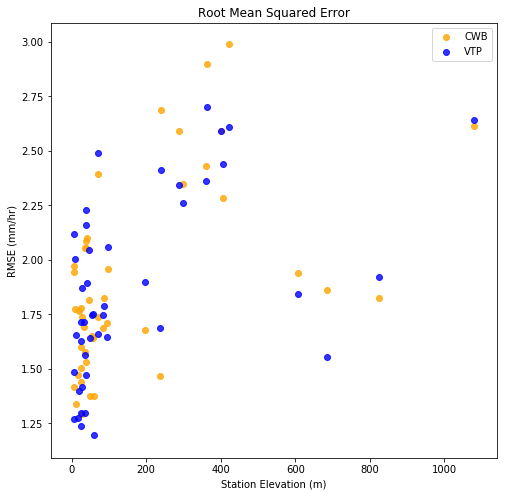

In [11]:
# Plot
%matplotlib inline
import matplotlib.pyplot as plt

complm_el = complm.sort_values('elevation').reset_index(drop=True)

plt.figure(figsize=(8,8))
plt.title('Root Mean Squared Error')
plt.ylabel('RMSE (mm/hr)')
plt.xlabel('Station Elevation (m)')
plt.scatter(cwb['elevation'], cwb['rmse'], color='orange', alpha=0.8, label='CWB')
plt.scatter(complm['elevation'], complm['rmse_lm'], color='blue', alpha=0.8, label='VTP')
plt.legend()
plt.show()

## Binary Classification

30mm/hr as threshold (99.9%).

In [12]:
# CWB QPE
evcwbbc = pd.read_csv('cwb_qpe_eval_2016_binary_classification.csv')
print(evcwbbc['prevalence'].describe())
# Our QPE
evbcglm = pd.read_csv('enc_bc_glm_test.csv')
# Prepare data for visualization
cwbbc = pd.merge(stdinfo.loc[:,['id','elevation','lon','lat']], evcwbbc.loc[:,['id','sensitivity','fpr','F1']], on='id')
compbcglm = cwbbc.merge(evbcglm.loc[:,['id','sensitivity','fpr','F1']], on='id', suffixes=('_cwb', '_glm'))
#print(comp.head())
print(compbcglm.describe())

count    45.000000
mean      0.000919
std       0.000554
min       0.000242
25%       0.000487
50%       0.000790
75%       0.001254
max       0.002070
Name: prevalence, dtype: float64
         elevation         lon        lat  sensitivity_cwb    fpr_cwb  \
count    45.000000   45.000000  45.000000        45.000000  45.000000   
mean    170.568889  121.589260  25.053096         0.362667   0.000509   
std     240.090615    0.155795   0.102089         0.328332   0.000350   
min       6.000000  121.346300  24.776200         0.000000   0.000000   
25%      26.700000  121.490400  24.993900         0.060000   0.000300   
50%      55.000000  121.546300  25.055400         0.220000   0.000400   
75%     241.000000  121.658800  25.117500         0.670000   0.000800   
max    1079.000000  122.002100  25.263800         1.000000   0.001500   

          F1_cwb  sensitivity_glm    fpr_glm     F1_glm  
count  45.000000        45.000000  45.000000  45.000000  
mean    0.284104         0.800000   0.013

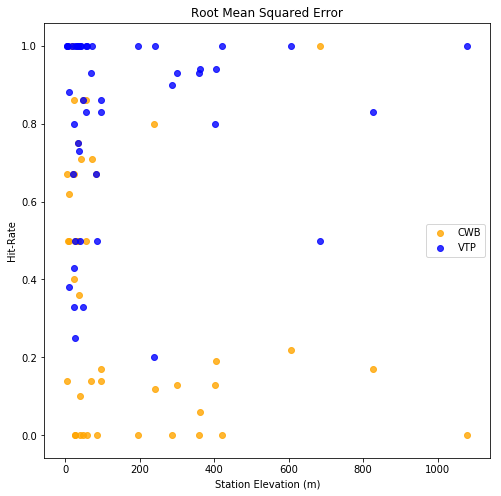

In [13]:
plt.figure(figsize=(8,8))
plt.title('Root Mean Squared Error')
plt.ylabel('Hit-Rate')
plt.xlabel('Station Elevation (m)')
plt.scatter(compbcglm['elevation'], compbcglm['sensitivity_cwb'], color='orange', alpha=0.8, label='CWB')
plt.scatter(compbcglm['elevation'], compbcglm['sensitivity_glm'], color='blue', alpha=0.8, label='VTP')
plt.legend()
plt.show()